<a href="https://colab.research.google.com/github/GaBevilacqua/CD/blob/Australia/Melbourne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Estatísticas e modelagem
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('melb_data.csv')


# Visualizar primeiras 5 linhas

In [ ]:
display(df.head())


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Informações

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# Estatisticas Descritivas

In [ ]:
display(df.describe())

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
# Valores Nulos

In [ ]:
display(df.isnull().sum())

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


# Gráficos

**PPreço por valores**

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Price']==0], x="", bins=30, kde=True)
plt.title("Preço x Distribuição")
plt.xlabel("Preço")
plt.ylabel("Count")
plt.show()

ValueError: Could not interpret value `Age` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

**Mapa de Calor**

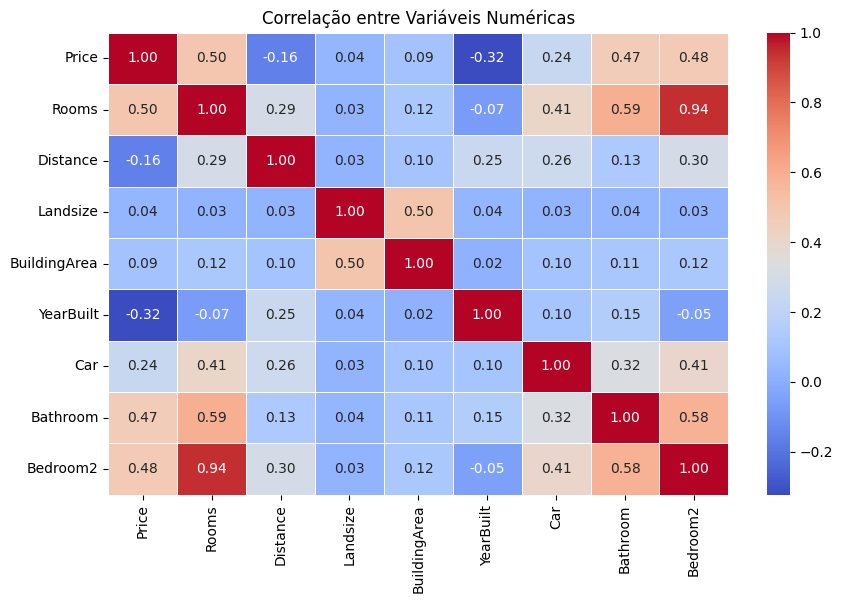

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[['Price', 'Rooms', 'Distance','Landsize', 'BuildingArea', 'YearBuilt', 'Car', 'Bathroom', 'Bedroom2']].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Variáveis Numéricas")
plt.show()

**Histrograma**

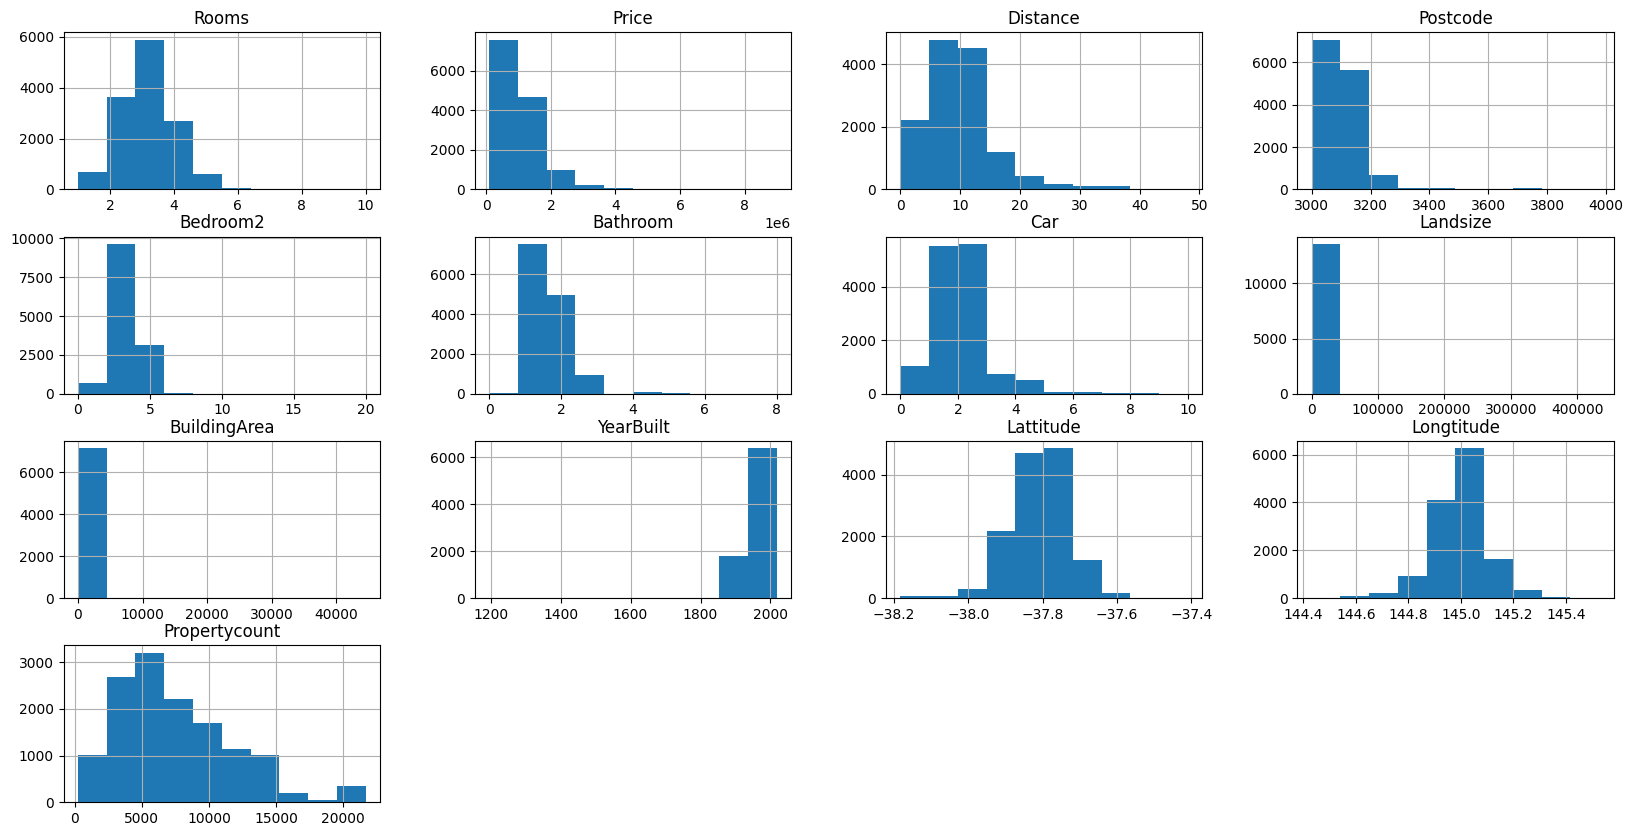

In [ ]:
df.hist(figsize=(20,10));

**Por região**


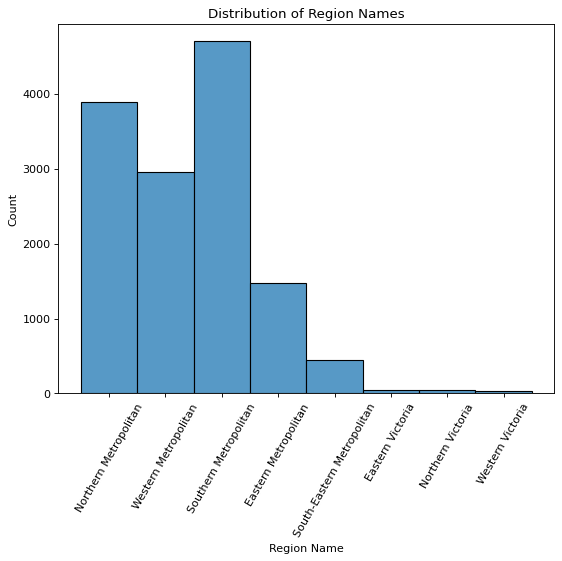

In [ ]:



plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data=df, x='Regionname')
plt.title("Distribution of Region Names")
plt.xlabel("Region Name")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.show()

In [ ]:
type_mapping = {
    'br': 'bedroom(s)',
    'h': 'house, cottage, villa, semi, terrace',
    'u': 'unit, duplex',
    't': 'townhouse',
    'dev site': 'development site',
    'o res': 'other residential'
}

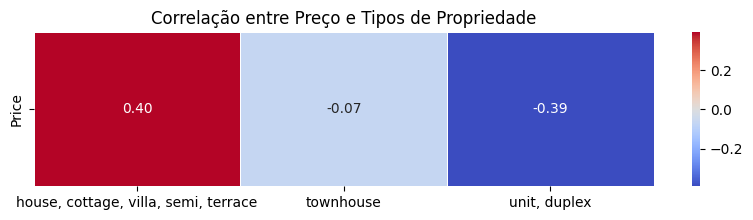

In [ ]:
# 2. Heatmap para variáveis categóricas (ex: 'Type')
# One-hot encode da coluna 'Type'
df_encoded = pd.get_dummies(df['Type'].map(type_mapping))  # Usa o dicionário de descrições

# Calcular correlação com variáveis numéricas (ex: Price)
corr_categorical = df[['Price']].join(df_encoded).corr()

# Plotar apenas a linha de correlação com 'Price'
plt.figure(figsize=(10, 2))
sns.heatmap(corr_categorical.iloc[0:1, 1:], annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Preço e Tipos de Propriedade")
plt.show()

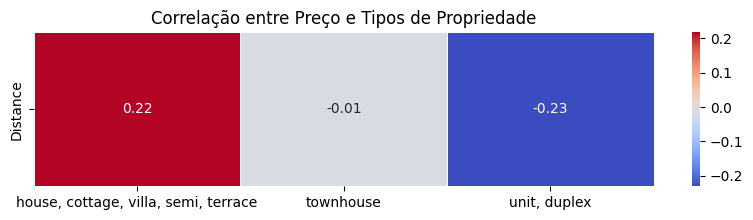

In [ ]:
# 2. Heatmap para variáveis categóricas (ex: 'Type')
# One-hot encode da coluna 'Type'
df_encoded = pd.get_dummies(df['Type'].map(type_mapping))  # Usa o dicionário de descrições

# Calcular correlação com variáveis numéricas (ex: Price)
corr_categorical = df[['Distance']].join(df_encoded).corr()

# Plotar apenas a linha de correlação com 'Price'
plt.figure(figsize=(10, 2))
sns.heatmap(corr_categorical.iloc[0:1, 1:], annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Preço e Tipos de Propriedade")
plt.show()